<a href="https://colab.research.google.com/github/Davron030901/Scikit_learning/blob/main/Clastering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [73]:
!wget https://github.com/Davron030901/Machine_Learning/raw/main/data/Mall_Customers.csv

--2025-01-07 12:13:45--  https://github.com/Davron030901/Machine_Learning/raw/main/data/Mall_Customers.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Davron030901/Machine_Learning/main/data/Mall_Customers.csv [following]
--2025-01-07 12:13:45--  https://raw.githubusercontent.com/Davron030901/Machine_Learning/main/data/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv.2’

Mall_Customers.csv. 100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-01-07 12:13:45 (40.7 MB/s) - ‘Mall_Customers.csv.2’ saved [398

In [74]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [76]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [77]:
past=df.loc[df['Annual Income (k$)']<50]

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

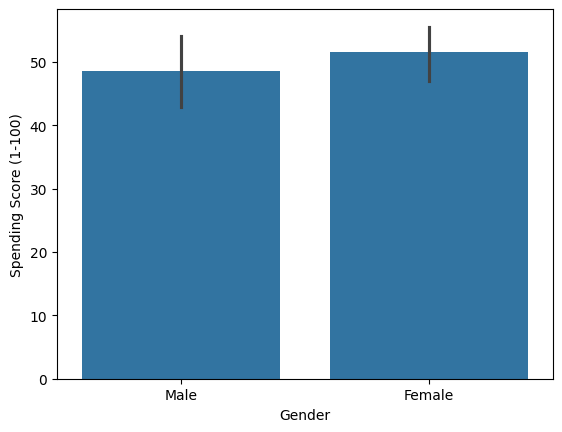

In [78]:
sns.barplot(x='Gender',y='Spending Score (1-100)',data=df)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

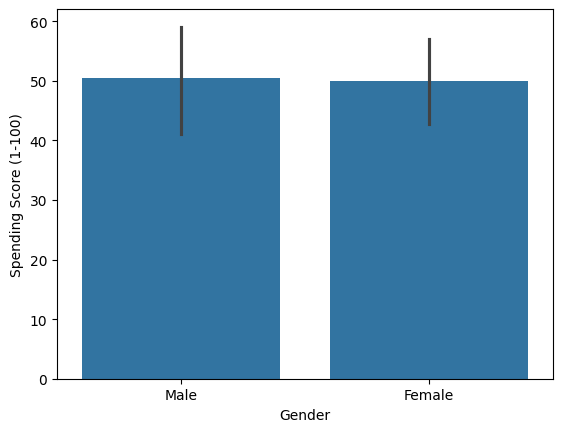

In [79]:
sns.barplot(x='Gender',y='Spending Score (1-100)',data=past)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

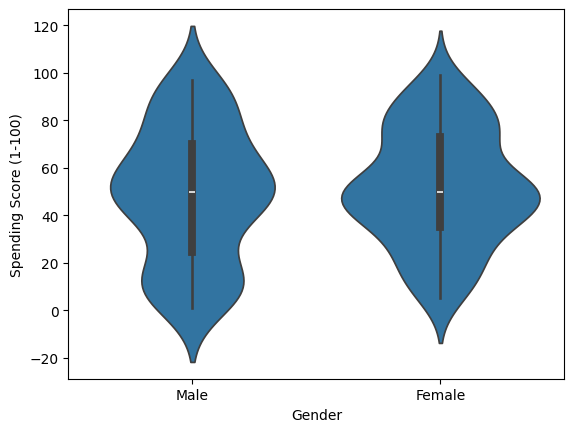

In [80]:
sns.violinplot(x='Gender',y='Spending Score (1-100)',data=df)

In [81]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [82]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [84]:
df.drop('CustomerID',axis=1,inplace=True)

In [85]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df.Age=ss.fit_transform(df[['Age']])
df['Annual Income (k$)']=ss.fit_transform(df[['Annual Income (k$)']])
df['Spending Score (1-100)']=ss.fit_transform(df[['Spending Score (1-100)']])

In [86]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0,-0.276302,2.268791,1.118061
196,0,0.441365,2.497807,-0.861839
197,1,-0.491602,2.497807,0.923953
198,1,-0.491602,2.917671,-1.250054


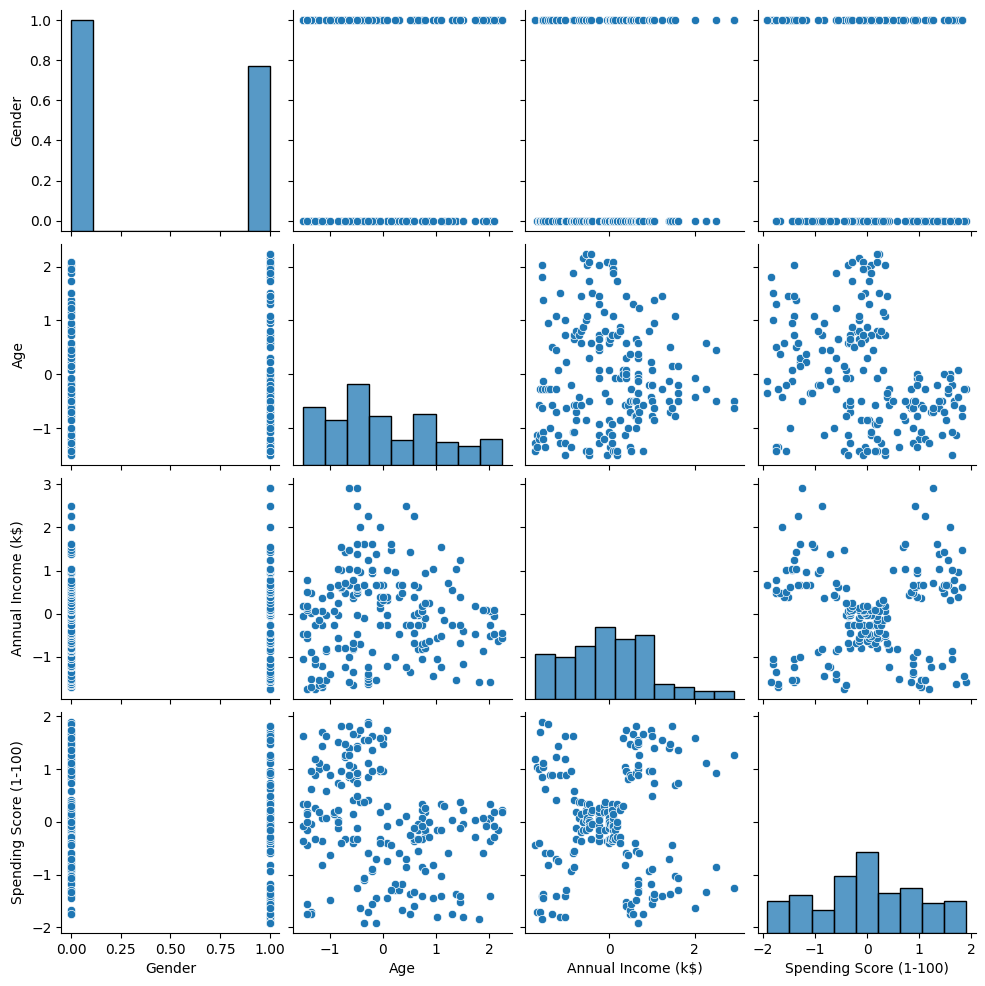

In [87]:
sns.pairplot(df)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

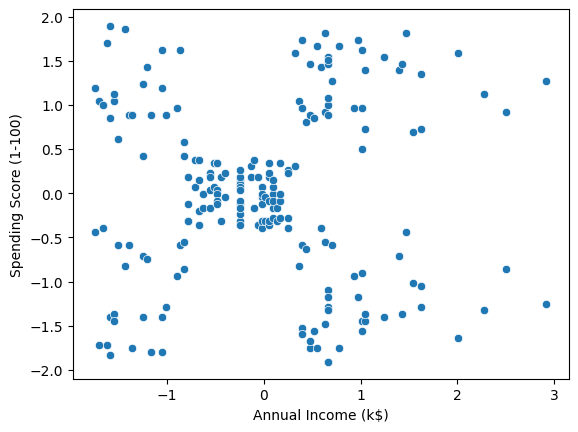

In [88]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

##KMeans

In [89]:
from sklearn.cluster import KMeans
KM=KMeans(n_clusters = 7 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111 )
KM.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=7, n_init=10, random_state=111)

In [90]:
KM.cluster_centers_

array([[-1.32954532,  1.13217788],
       [-0.21657044, -0.01169561],
       [-1.30751869, -1.13696536],
       [ 1.87564575, -1.09476801],
       [ 1.87564575,  1.23452563],
       [ 0.70384427, -1.30469201],
       [ 0.68673384,  1.241219  ]])

In [91]:
from sklearn.metrics import silhouette_score
silhouette_score(df,KM.labels_)

0.22448412157137723

In [92]:
KM.n_features_in_

2

In [93]:
KM.n_iter_

5

In [94]:
KM.labels_

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 1, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4], dtype=int32)

Text(0, 0.5, 'Spending Score (1-100)')

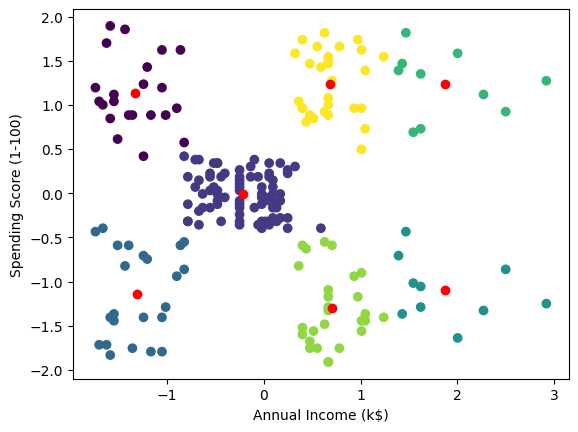

In [95]:
# graphic of result and Gender change

plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=KM.labels_)
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],color='red')
# plt.scatter(df.loc[df['Gender']==0,'Annual Income (k$)'],df.loc[df['Gender']==0,'Spending Score (1-100)'],color='orange')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [96]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

In [97]:
algorithm = (KMeans(n_clusters = 7 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

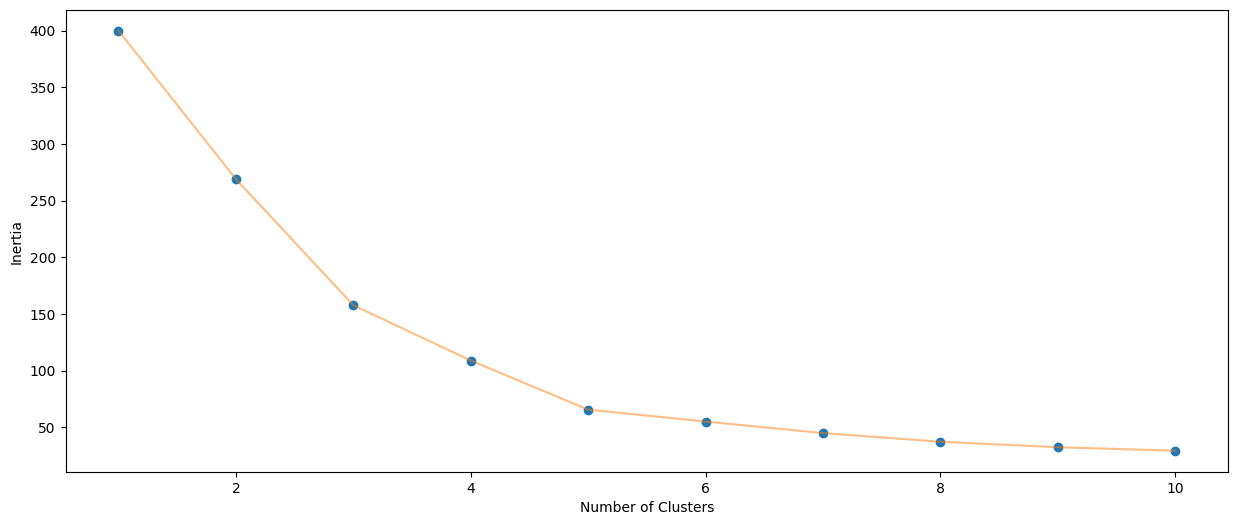

In [98]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [99]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

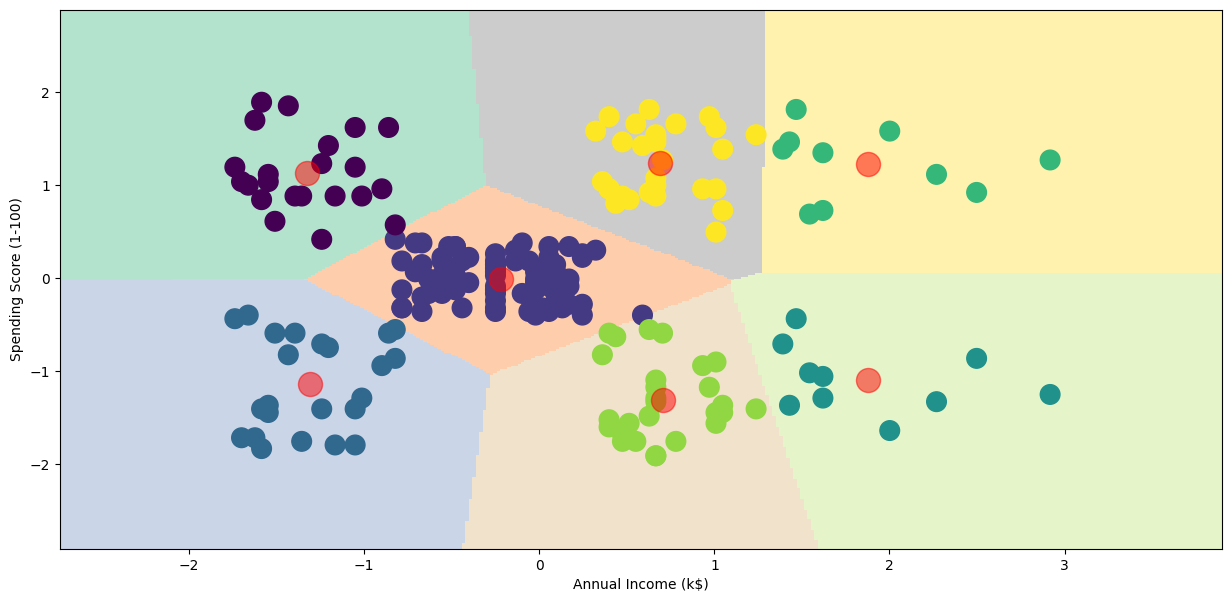

In [100]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 ,
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [101]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

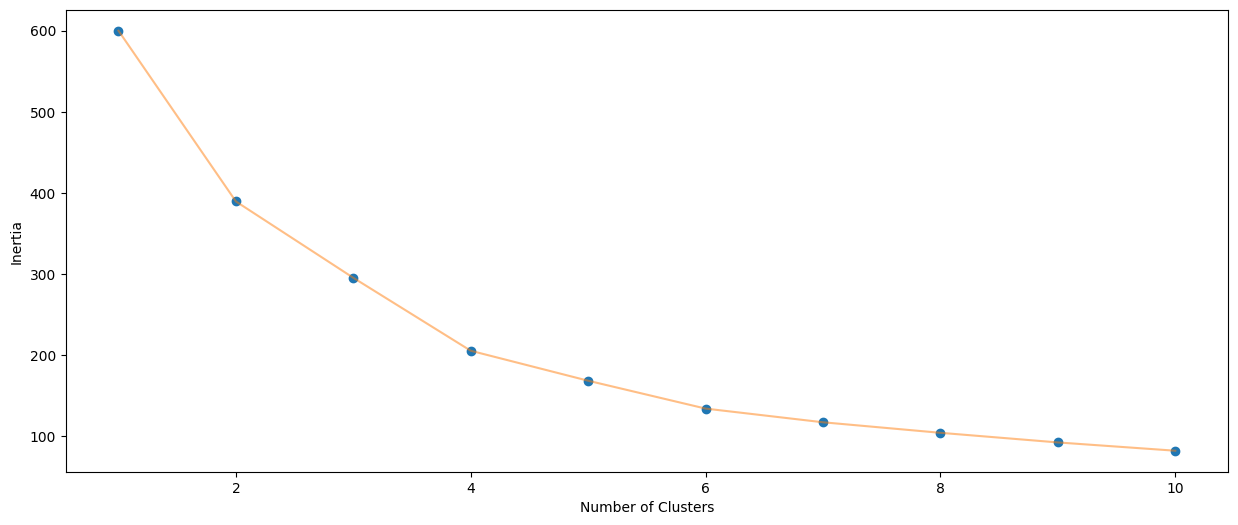

In [102]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [103]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [104]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'],
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)